<a href="https://colab.research.google.com/github/alyyokomichi/Predicting_heart_failure/blob/main/ML_HeartFailure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=blue size=7>**Heart Failure Prediction**</font>

*by Anna Laura Yuri Yokomichi*

***
Dataset used in this work was obtained from Kaggle, produced by Davide Chicco and Giuseppe Jurman. Article "Machine learning can predict heart failure patient survival with serum creatinine and ejection fraction alone" published in BMC Medical Informatics and Decision Making, 20, 16 (2020).

# 1 Introduction

Heart failure is a common event caused by Cardiovascular diseases (CVDs) and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# 2 Objective

Analyze the dataset and use machine learning model for predicting mortality caused by Heart Failure.

# 3 Method

Pandas, Numpay, Matplotlib, Seaborn libraries were used for data analysis and graphing.

Cross Validate and hyperparameter optimization were used with machine learning model to predicting mortality caused by Heart Failure.

# 4 Analysis

## 4.1 Importing libriries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


## 4.2 Exploring the data

In [3]:
# Checking null variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


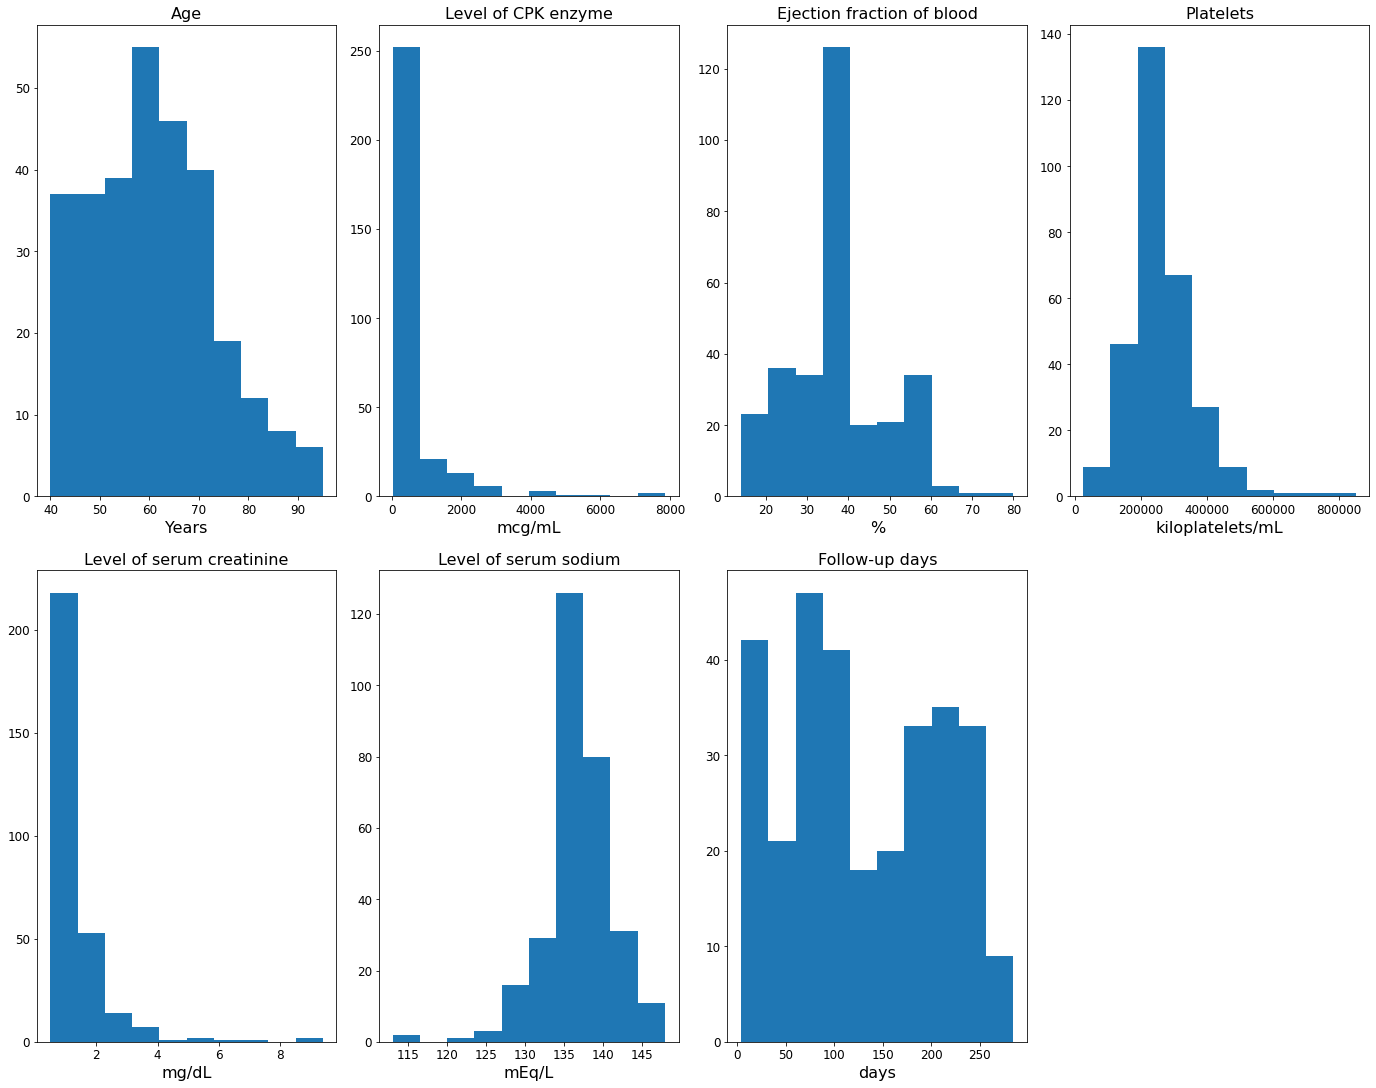

In [4]:
# Histogram of some features

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (19, 15), constrained_layout=True)
spec = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

# age
f_ax1 = fig.add_subplot(spec[0, 0])
f_ax1.set_title('Age', fontsize= 16)
f_ax1.set_xlabel("Years", fontsize=16)
f_ax1.hist(df['age'])
f_ax1.tick_params(labelsize=12)

# creatinine_phosphokinase
f_ax1 = fig.add_subplot(spec[0, 1])
f_ax1.set_title('Level of CPK enzyme', fontsize= 16)
f_ax1.set_xlabel("mcg/mL", fontsize=16)
f_ax1.hist(df['creatinine_phosphokinase'])
f_ax1.tick_params(labelsize=12)

# ejection_fraction
f_ax1 = fig.add_subplot(spec[0, 2])
f_ax1.set_title('Ejection fraction of blood', fontsize= 16)
f_ax1.set_xlabel("%", fontsize=16)
f_ax1.hist(df['ejection_fraction'])
f_ax1.tick_params(labelsize=12)

# platelets
f_ax1 = fig.add_subplot(spec[0, 3])
f_ax1.set_title('Platelets', fontsize= 16)
f_ax1.set_xlabel("kiloplatelets/mL", fontsize=16)
f_ax1.hist(df['platelets'])
f_ax1.tick_params(labelsize=12)

# serum_creatinine
f_ax1 = fig.add_subplot(spec[1, 0])
f_ax1.set_title('Level of serum creatinine', fontsize= 16)
f_ax1.set_xlabel("mg/dL", fontsize=16)
f_ax1.hist(df['serum_creatinine'])
f_ax1.tick_params(labelsize=12)

# serum_sodium
f_ax1 = fig.add_subplot(spec[1, 1])
f_ax1.set_title('Level of serum sodium', fontsize= 16)
f_ax1.set_xlabel("mEq/L", fontsize=16)
f_ax1.hist(df['serum_sodium'])
f_ax1.tick_params(labelsize=12)

# time
f_ax1 = fig.add_subplot(spec[1, 2])
f_ax1.set_title('Follow-up days', fontsize= 16)
f_ax1.set_xlabel("days", fontsize=16)
f_ax1.hist(df['time'])
f_ax1.tick_params(labelsize=12)

plt.show()

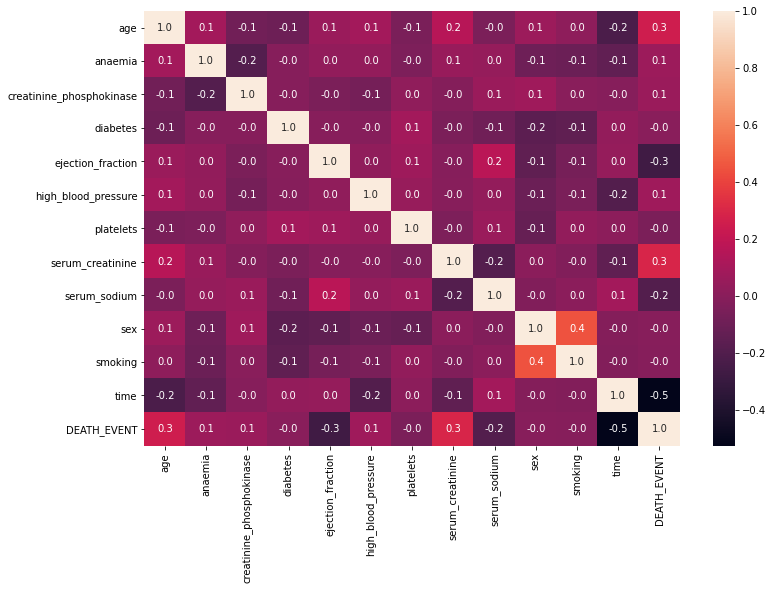

In [5]:
# Correlation between variables
matrix_c = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(matrix_c, annot=True, fmt='.1f')

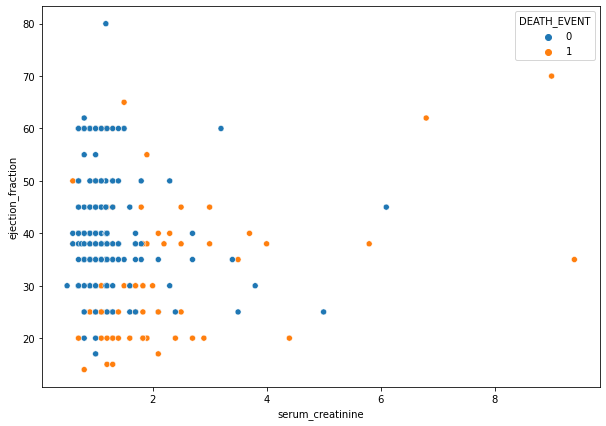

In [6]:
# Relation between serum creatinine level and ejection fraction

plt.figure(figsize=(10, 7))
sns.scatterplot (x="serum_creatinine", y='ejection_fraction', hue='DEATH_EVENT', data=df)

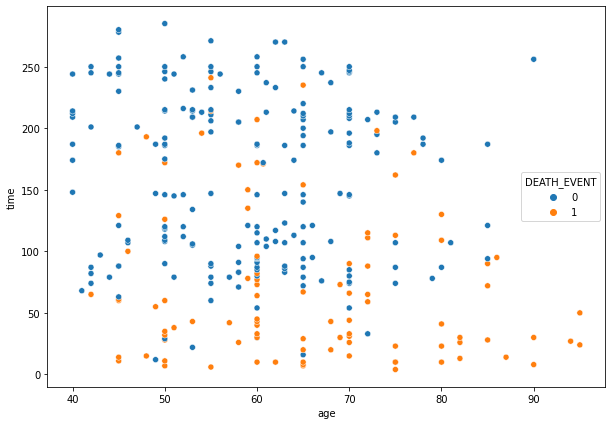

In [7]:
# Relation between age and follow-up days

plt.figure(figsize=(10, 7))
sns.scatterplot (x="age", y='time', hue='DEATH_EVENT', data=df)

# 5 Predicting

## 5.1 Separanting variables _ 1

In [8]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 1234
np.random.seed(SEED)

df_v2 = df.drop(columns=['DEATH_EVENT'])

# Separating train, test and validation variables
x_train_test, x_validation, y_train_test, y_validation = train_test_split(df_v2, df['DEATH_EVENT'], test_size=0.5, shuffle=True, stratify = df['DEATH_EVENT'])
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.25, shuffle=True, stratify=y_train_test)

## 5.2 Testing models

In [9]:
#Simple classifier
from sklearn.dummy import DummyClassifier

random.seed(SEED)

classifier = DummyClassifier()
classifier.fit(x_train, y_train)
print('DummyClassifier score: %.2f%%'%(classifier.score(x_test, y_test)*100))

DummyClassifier score: 52.63%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [10]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

random.seed(SEED)

classifier = AdaBoostClassifier()
classifier.fit(x_train, y_train)
print('AdaBoostClassifier score: %.2f%%'%(classifier.score(x_test, y_test)*100))

AdaBoostClassifier score: 84.21%


In [11]:
# RandomFlorestClassifier
from sklearn.ensemble import RandomForestClassifier

random.seed(SEED)

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
print('RandomFlorestClassifier score: %.2f%%'%(classifier.score(x_test, y_test)*100))

RandomFlorestClassifier score: 84.21%


In [12]:
# Change scale for Support Vector Machines
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_t = scaler.transform(x_train)
x_test_t = scaler.transform(x_test)

In [13]:
# LinearSCV
from sklearn.svm import LinearSVC

random.seed(SEED)

classifier = LinearSVC()
classifier.fit(x_train_t, y_train)
print('LinearSVC score: %.2f%%'%(classifier.score(x_test_t, y_test)*100))

LinearSVC score: 73.68%


## 5.3 Cross Validation

Models with high score were AdaBoostClassifier and RandomForestClassifier

In [14]:
def show_results(results):
  m = results['test_score'].mean() * 100
  d = results['test_score'].std() * 100
  print("Mean accuracy %.2f%%" % m)
  print("Interval [%.2f, %.2f]" % (m - 2 * d, m + 2 * d))

In [15]:
from sklearn.model_selection import cross_validate

np.random.seed(SEED)

model = DummyClassifier()
results = cross_validate(model, x_train_test, y_train_test, cv = 10, return_train_score=False)
show_results(results)

Mean accuracy 62.38%
Interval [23.53, 101.23]


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [16]:
np.random.seed(SEED)

model = RandomForestClassifier()
results = cross_validate(model, x_train_test, y_train_test, cv = 10, return_train_score=False)
show_results(results)

Mean accuracy 86.57%
Interval [78.12, 95.02]


In [17]:
np.random.seed(SEED)

model = AdaBoostClassifier()
results = cross_validate(model, x_train_test, y_train_test, cv = 10, return_train_score=False)
show_results(results)

Mean accuracy 85.29%
Interval [73.79, 96.78]


## 5.4 Selecting best features

In [18]:
from sklearn.feature_selection import RFECV

random.seed(SEED)

model = RandomForestClassifier()
model.fit(x_train, y_train)
selector_rfecv = RFECV(estimator = model, cv=5 , step=1, scoring='accuracy')
selector_rfecv.fit(x_train, y_train)
train_rfecv = selector_rfecv.transform(x_train)
test_rfecv = selector_rfecv.transform(x_test)
model.fit(train_rfecv, y_train)
selected_features = x_train.columns[selector_rfecv.support_]
print('Classification result: %.2f%%'%(model.score(test_rfecv, y_test)*100))
print(f'Ideal number of features: {selector_rfecv.n_features_}')
print(f'Features: {selected_features}')

Classification result: 86.84%
Ideal number of features: 7
Features: Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time'],
      dtype='object')


In [19]:
# Remove features of dataframe
df_v3 = df_v2[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]
df_v3

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [20]:
# Selecting new variables for train, test and validation
np.random.seed(SEED)

x_train_test, x_validation, y_train_test, y_validation = train_test_split(df_v3, df['DEATH_EVENT'], test_size=0.5, shuffle=True, stratify = df['DEATH_EVENT'])
x_train, x_test, y_train, y_test = train_test_split(x_train_test, y_train_test, test_size=0.25, shuffle=True, stratify=y_train_test)

## 5.5 Optimizing machine learning model

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from scipy.stats import randint

np.random.seed(SEED)

parameters = {
    'n_estimators': [10, 30, 50, 70, 90, 100],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}
cv = KFold(n_splits=10, shuffle=True)
search = RandomizedSearchCV(RandomForestClassifier(), parameters, n_iter=100, cv=cv, random_state=SEED)
search.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                            

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(search, x_train_test, y_train_test, cv=cv)
m = scores.mean() * 100
d = scores.std() * 100
print("Mean accuracy %.2f%%" % m)
print("Interval [%.2f, %.2f]" % (m - 2 * d, m + 2 * d))

Mean accuracy 80.57%
Interval [63.36, 97.78]


In [34]:
results = pd.DataFrame(search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.053196,0.002984,0.007553,0.001382,50,32,128,3,gini,False,"{'n_estimators': 50, 'min_samples_split': 32, ...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
1,0.016529,0.000841,0.002747,0.000107,10,32,64,3,entropy,True,"{'n_estimators': 10, 'min_samples_split': 32, ...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
2,0.102879,0.003074,0.008986,0.000213,70,32,64,3,gini,True,"{'n_estimators': 70, 'min_samples_split': 32, ...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
3,0.093581,0.003122,0.012638,0.002943,90,128,64,6,entropy,False,"{'n_estimators': 90, 'min_samples_split': 128,...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
4,0.099501,0.006103,0.011118,0.000360,90,64,32,3,entropy,False,"{'n_estimators': 90, 'min_samples_split': 64, ...",0.666667,1.000000,0.818182,0.727273,0.909091,0.636364,0.727273,0.636364,0.909091,0.636364,0.766667,0.127164,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.106412,0.009300,0.010302,0.001964,70,128,128,3,entropy,True,"{'n_estimators': 70, 'min_samples_split': 128,...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
96,0.053929,0.002187,0.008093,0.001542,50,32,128,5,gini,False,"{'n_estimators': 50, 'min_samples_split': 32, ...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
97,0.076259,0.004395,0.007595,0.001346,50,64,128,6,entropy,True,"{'n_estimators': 50, 'min_samples_split': 64, ...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14
98,0.076895,0.006147,0.007008,0.000366,50,128,64,6,gini,True,"{'n_estimators': 50, 'min_samples_split': 128,...",0.666667,0.727273,0.727273,0.636364,0.727273,0.636364,0.545455,0.727273,0.818182,0.545455,0.675758,0.082489,14


In [36]:
best = search.best_estimator_
print(best)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=64,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


## 5.6 Prediction

In [37]:
classifier = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=64,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
classifier.fit(x_train_test, y_train_test)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=32, min_samples_split=64,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

[Text(56.5, 0.5, 'Real'), Text(0.5, 56.5, 'Predic')]

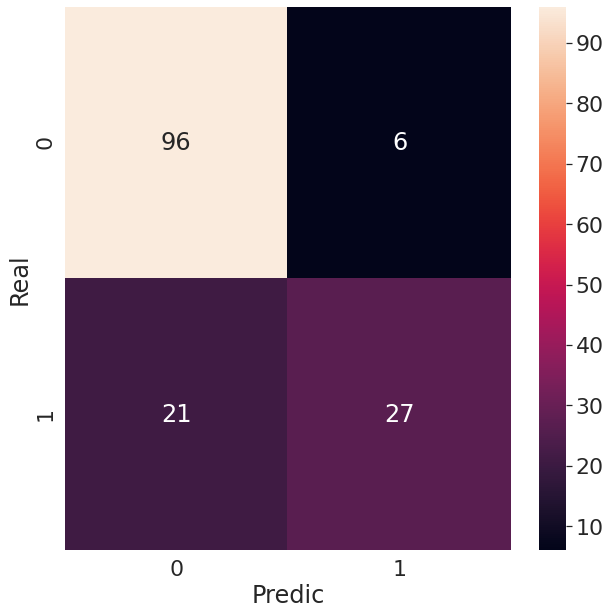

In [38]:
from sklearn.metrics import confusion_matrix

matrix_c = confusion_matrix(y_validation, classifier.predict(x_validation))
plt.figure(figsize=(10, 10))
sns.set(font_scale=2)
sns.heatmap(matrix_c, annot=True, fmt='d').set(xlabel='Predic', ylabel='Real')